In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os 
import hvplot.pandas


In [2]:
CLEAN_CSV_PATH = os.path.join("filtered_database.csv")



In [3]:
# Sample DataFrame
clean_df = pd.read_csv(CLEAN_CSV_PATH)
print(clean_df.shape)
clean_df.head()

(19826, 25)


,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Perc_Local_wrk,Perc_Local_wrk_Range,Ac_Total,Ac_Unpr,P_WrkAge,...,R_MedWageWk,R_HiWageWk,TotEmp,D1B,D1C,D4A,D5AR,NatWalkInd,levels of walkability,Percentage_Range
0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,26-50%,51.444490,50.313740,0.705,...,120,181,11,26.791886,0.218628,962.92,661739,10.500000,below average walkable,26-50%
1,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,26-50%,1025.230008,960.425575,0.560,...,128,653,282,1.632610,0.293620,944.15,140212,9.500000,below average walkable,26-50%
2,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,26-50%,1423.857411,1252.374073,0.557,...,217,473,4012,1.484381,3.203516,839.54,158876,13.000000,above average walkable,26-50%
3,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,26-50%,485.497632,433.369860,0.630,...,375,908,210,8.948476,0.484575,-99999.00,153467,5.833333,below average walkable,26-50%
4,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,26-50%,148.564674,147.595085,0.626,...,91,315,194,4.674952,1.314407,968.29,278458,14.666667,above average walkable,26-50%


In [4]:
transportation_df = clean_df[["CBSA_Name", "CBSA_POP", "AutoOwn0", "AutoOwn1", "AutoOwn2p", "D4A", "D5AR", "NatWalkInd"]]
transportation_df.head()



,CBSA_Name,CBSA_POP,AutoOwn0,AutoOwn1,AutoOwn2p,D4A,D5AR,NatWalkInd
0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,26,94,271,962.92,661739,10.500000
1,"New York-Newark-Jersey City, NY-NJ-PA",19318471,12,120,402,944.15,140212,9.500000
2,"New York-Newark-Jersey City, NY-NJ-PA",19318471,13,171,360,839.54,158876,13.000000
3,"New York-Newark-Jersey City, NY-NJ-PA",19318471,0,202,869,-99999.00,153467,5.833333
4,"New York-Newark-Jersey City, NY-NJ-PA",19318471,0,50,215,968.29,278458,14.666667


In [5]:
transportation_groupby = transportation_df.groupby ("CBSA_Name")



In [6]:
sum_columns=["D5AR", "AutoOwn0", "AutoOwn1", "AutoOwn2p"]
transportation_sum_df=transportation_groupby.sum()[sum_columns]
transportation_sum_df.head()


,D5AR,AutoOwn0,AutoOwn1,AutoOwn2p
CBSA_Name,,,,
"Albany-Schenectady-Troy, NY",23667189,34465,123649,192187
"Amsterdam, NY",312914,2682,7068,9915
"Auburn, NY",663929,3304,10752,17195
"Batavia, NY",816582,1940,7747,13994
"Binghamton, NY",4109352,10568,35591,52480


In [7]:
mean_columns=["CBSA_POP", "NatWalkInd"]
transportation_mean_df=transportation_groupby.mean()[mean_columns]
transportation_mean_df.head()


,CBSA_POP,NatWalkInd
CBSA_Name,,
"Albany-Schenectady-Troy, NY",880481.0,10.129851
"Amsterdam, NY",49426.0,5.920635
"Auburn, NY",77868.0,7.745614
"Batavia, NY",58112.0,5.812865
"Binghamton, NY",243447.0,6.900937


In [8]:
transportation_all = pd.concat([transportation_mean_df, transportation_sum_df],axis="columns")
transportation_all.head()

,CBSA_POP,NatWalkInd,D5AR,AutoOwn0,AutoOwn1,AutoOwn2p
CBSA_Name,,,,,,
"Albany-Schenectady-Troy, NY",880481.0,10.129851,23667189,34465,123649,192187
"Amsterdam, NY",49426.0,5.920635,312914,2682,7068,9915
"Auburn, NY",77868.0,7.745614,663929,3304,10752,17195
"Batavia, NY",58112.0,5.812865,816582,1940,7747,13994
"Binghamton, NY",243447.0,6.900937,4109352,10568,35591,52480


In [9]:
location = pd.read_csv("county_lat_long.csv")
location.head()

,CBSA_Name,Lat,Lng
0,"Albany-Schenectady-Troy, NY",42.745522,-73.816521
1,"Amsterdam, NY",42.937744,-74.190353
2,"Auburn, NY",42.931782,-76.566139
3,"Batavia, NY",42.996910,-78.186028
4,"Binghamton, NY",42.098701,-75.912537


In [10]:
combined_transportation_data = pd.merge(location, transportation_all, on="CBSA_Name")
combined_transportation_data.head()

,CBSA_Name,Lat,Lng,CBSA_POP,NatWalkInd,D5AR,AutoOwn0,AutoOwn1,AutoOwn2p
0,"Albany-Schenectady-Troy, NY",42.745522,-73.816521,880481.0,10.129851,23667189,34465,123649,192187
1,"Amsterdam, NY",42.937744,-74.190353,49426.0,5.920635,312914,2682,7068,9915
2,"Auburn, NY",42.931782,-76.566139,77868.0,7.745614,663929,3304,10752,17195
3,"Batavia, NY",42.996910,-78.186028,58112.0,5.812865,816582,1940,7747,13994
4,"Binghamton, NY",42.098701,-75.912537,243447.0,6.900937,4109352,10568,35591,52480


In [11]:
combined_transportation_data["Percent AutoOwn0"]=combined_transportation_data["AutoOwn0"]/combined_transportation_data["CBSA_POP"]*100
combined_transportation_data.head()

,CBSA_Name,Lat,Lng,CBSA_POP,NatWalkInd,D5AR,AutoOwn0,AutoOwn1,AutoOwn2p,Percent AutoOwn0
0,"Albany-Schenectady-Troy, NY",42.745522,-73.816521,880481.0,10.129851,23667189,34465,123649,192187,3.914338
1,"Amsterdam, NY",42.937744,-74.190353,49426.0,5.920635,312914,2682,7068,9915,5.426294
2,"Auburn, NY",42.931782,-76.566139,77868.0,7.745614,663929,3304,10752,17195,4.243078
3,"Batavia, NY",42.996910,-78.186028,58112.0,5.812865,816582,1940,7747,13994,3.338381
4,"Binghamton, NY",42.098701,-75.912537,243447.0,6.900937,4109352,10568,35591,52480,4.340986


In [12]:
combined_transportation_data["Percent AutoOwn1"]=combined_transportation_data["AutoOwn1"]/combined_transportation_data["CBSA_POP"]*100
combined_transportation_data.head()

,CBSA_Name,Lat,Lng,CBSA_POP,NatWalkInd,D5AR,AutoOwn0,AutoOwn1,AutoOwn2p,Percent AutoOwn0,Percent AutoOwn1
0,"Albany-Schenectady-Troy, NY",42.745522,-73.816521,880481.0,10.129851,23667189,34465,123649,192187,3.914338,14.043347
1,"Amsterdam, NY",42.937744,-74.190353,49426.0,5.920635,312914,2682,7068,9915,5.426294,14.300166
2,"Auburn, NY",42.931782,-76.566139,77868.0,7.745614,663929,3304,10752,17195,4.243078,13.807983
3,"Batavia, NY",42.996910,-78.186028,58112.0,5.812865,816582,1940,7747,13994,3.338381,13.331154
4,"Binghamton, NY",42.098701,-75.912537,243447.0,6.900937,4109352,10568,35591,52480,4.340986,14.619609


In [13]:
combined_transportation_data["Percent AutoOwn2p"]=combined_transportation_data["AutoOwn2p"]/combined_transportation_data["CBSA_POP"]*100
combined_transportation_data.head()

,CBSA_Name,Lat,Lng,CBSA_POP,NatWalkInd,D5AR,AutoOwn0,AutoOwn1,AutoOwn2p,Percent AutoOwn0,Percent AutoOwn1,Percent AutoOwn2p
0,"Albany-Schenectady-Troy, NY",42.745522,-73.816521,880481.0,10.129851,23667189,34465,123649,192187,3.914338,14.043347,21.827501
1,"Amsterdam, NY",42.937744,-74.190353,49426.0,5.920635,312914,2682,7068,9915,5.426294,14.300166,20.060292
2,"Auburn, NY",42.931782,-76.566139,77868.0,7.745614,663929,3304,10752,17195,4.243078,13.807983,22.082242
3,"Batavia, NY",42.996910,-78.186028,58112.0,5.812865,816582,1940,7747,13994,3.338381,13.331154,24.081085
4,"Binghamton, NY",42.098701,-75.912537,243447.0,6.900937,4109352,10568,35591,52480,4.340986,14.619609,21.557053


In [14]:
#Outlier in data

combined_transportation_data[combined_transportation_data["NatWalkInd"]>12]

,CBSA_Name,Lat,Lng,CBSA_POP,NatWalkInd,D5AR,AutoOwn0,AutoOwn1,AutoOwn2p,Percent AutoOwn0,Percent AutoOwn1,Percent AutoOwn2p
16,"New York-Newark-Jersey City, NY-NJ-PA",40.729286,-74.055087,19318471.0,12.582974,6660157093,2134614,2243769,2583877,11.049601,11.61463,13.375163


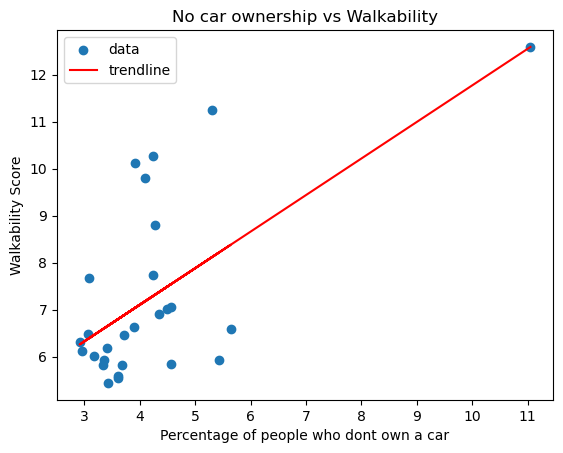

In [15]:
#BASED ON PERCENTAGE - OWNS NO CARS

# Get data
combined_transportation_data = combined_transportation_data.sort_values(by = "AutoOwn0")
autoOwn0 = combined_transportation_data["Percent AutoOwn0"]
natWalk = combined_transportation_data["NatWalkInd"]

# Convert "AutoOwn0" column to numeric 
autoOwn0 = pd.to_numeric(autoOwn0, errors='coerce')

# Remove NaN values and both arrays with same length
autoOwn0 = autoOwn0.dropna()
natWalk = natWalk.iloc[:len(autoOwn0)]  

# Linear regression
slope, intercept = np.polyfit(autoOwn0, natWalk, 1)

# Create scatter plot
plt.scatter(autoOwn0, natWalk, label='data')

# Plot the trendline
trendline = slope * autoOwn0 + intercept
plt.plot(autoOwn0, trendline, color='red', label='trendline')

# Add axis labels
plt.xlabel('Percentage of people who dont own a car')
plt.ylabel('Walkability Score')
plt.title('No car ownership vs Walkability')

#plt.xticks(range(len(autoOwn0)), combined_transportation_data["CBSA_Name"],rotation=90)

plt.legend()

#save image
#plt.savefig('No car ownership - scatter.png', dpi = 500)

plt.show()


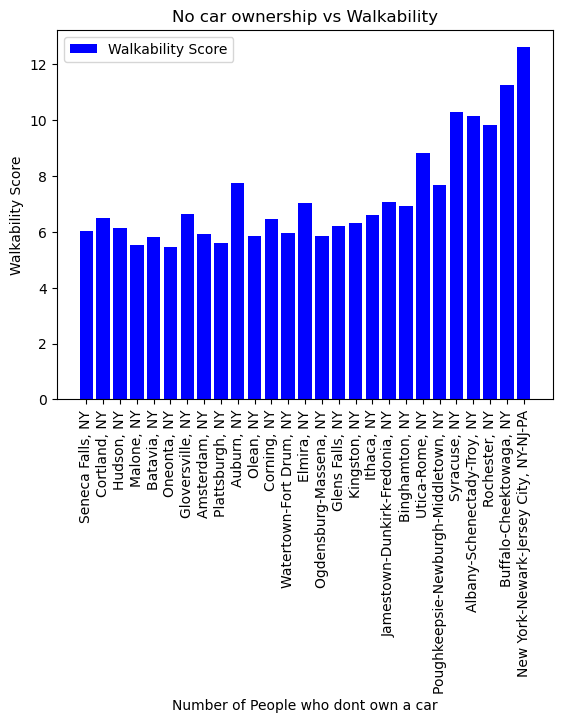

In [16]:
#BASED ON RAW NUMBERS - OWNS NO CARS

# Get data
combined_transportation_data = combined_transportation_data.sort_values(by = "AutoOwn0")
autoOwn0 = combined_transportation_data["AutoOwn0"]
natWalk = combined_transportation_data["NatWalkInd"]

# Plot the bar graph
plt.bar(range(len(autoOwn0)), natWalk, color='blue', label='Walkability Score')
#plt.bar(autoOwn0, natWalk, color='blue', label='Walkability Score')

# Add axis labels
plt.xlabel('Number of People who dont own a car')
plt.ylabel('Walkability Score')
plt.title('No car ownership vs Walkability')

# Set x-axis ticks and labels
plt.xticks(range(len(autoOwn0)), combined_transportation_data["CBSA_Name"],rotation=90)

# Display the legend
plt.legend()

##save image
#plt.gcf().set_size_inches(8,8)
#plt.tight_layout()
#plt.savefig('No car ownership - bar.png', dpi = 500)

# Display the plot
plt.show()


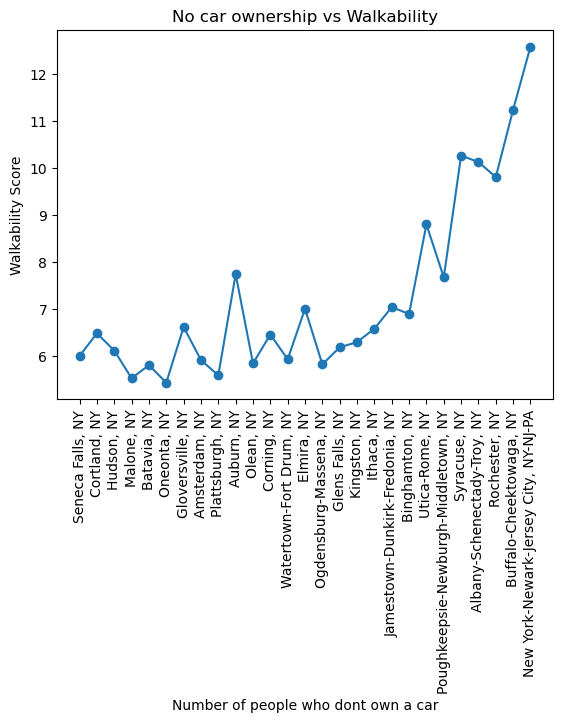

In [17]:
#BASED ON RAW DATA - OWNS NO CARS

# Get data
combined_transportation_data = combined_transportation_data.sort_values(by = "AutoOwn0")
autoOwn0 = combined_transportation_data["AutoOwn0"]
natWalk = combined_transportation_data["NatWalkInd"]

# Plot the line chart
plt.plot(range(len(autoOwn0)), natWalk, marker='o', linestyle='-')

plt.xticks(range(len(autoOwn0)), combined_transportation_data["CBSA_Name"],rotation=90)

# Add labels and title
plt.xlabel('Number of people who dont own a car')
plt.ylabel('Walkability Score')
plt.title('No car ownership vs Walkability')

##save image
#plt.gcf().set_size_inches(8,8)
#plt.tight_layout()
plt.savefig('No car ownership - line.png', dpi = 500)

# Display the plot
plt.show()

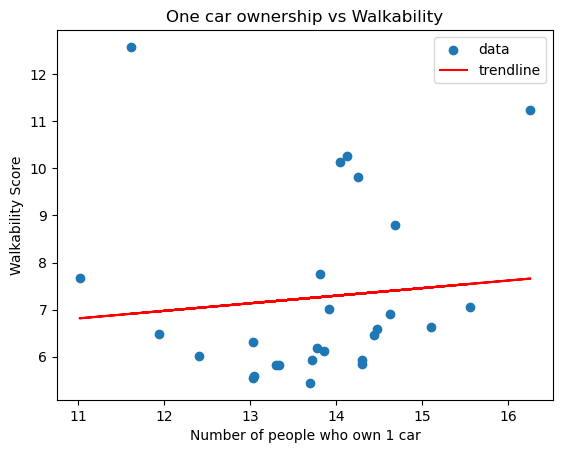

In [18]:
#BASED ON PERCENTAGE - OWNS 1 CAR

# Get data
#combined_transportation_data = combined_transportation_data.sort_values(by = "AutoOwn1")
autoOwn1 = combined_transportation_data["Percent AutoOwn1"]
natWalk = combined_transportation_data["NatWalkInd"]

#linear regression
slope, intercept = np.polyfit(autoOwn1, natWalk, 1)

#creates scatter plot
plt.scatter(autoOwn1, natWalk, label='data')

#plot the trendline
trendline = slope * autoOwn1 + intercept
plt.plot (autoOwn1, trendline, color='red', label='trendline')

# Add axis labels
plt.xlabel('Number of people who own 1 car')
plt.ylabel('Walkability Score')
plt.title('One car ownership vs Walkability')

plt.legend()

#save image
#plt.savefig('1 car ownership - scatter.png', dpi = 500)

plt.show()


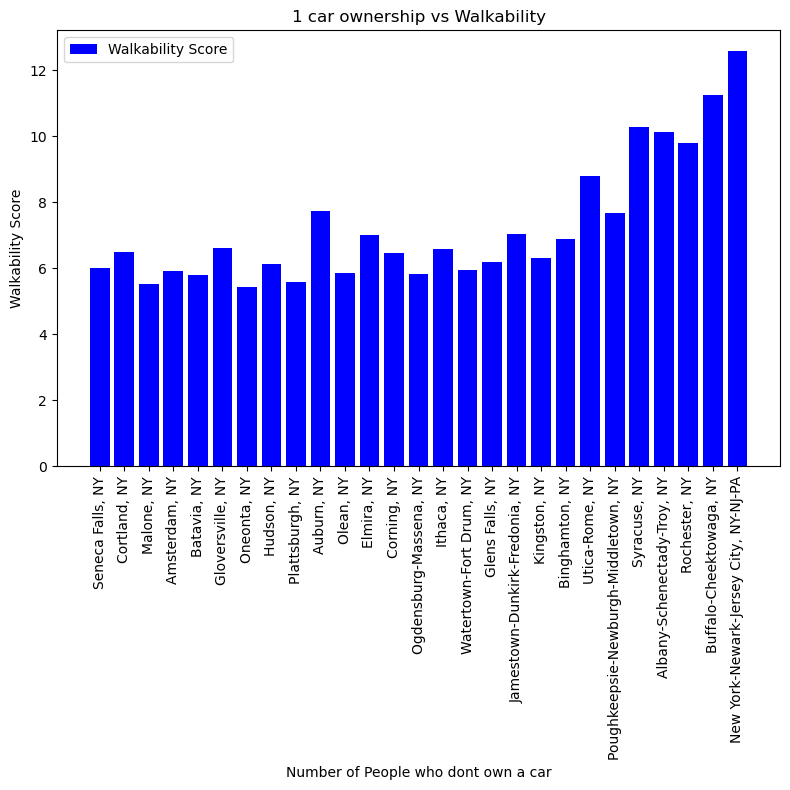

In [19]:
#BASED ON RAW NUMBERS - OWNS 1 CAR

# Get data
combined_transportation_data = combined_transportation_data.sort_values(by = "AutoOwn1")
autoOwn1 = combined_transportation_data["AutoOwn0"]
natWalk = combined_transportation_data["NatWalkInd"]

# Plot the bar graph
plt.bar(range(len(autoOwn1)), natWalk, color='blue', label='Walkability Score')

# Add axis labels
plt.xlabel('Number of People who dont own a car')
plt.ylabel('Walkability Score')
plt.title('1 car ownership vs Walkability')

# Set x-axis ticks and labels
plt.xticks(range(len(autoOwn1)), combined_transportation_data["CBSA_Name"],rotation=90)

# Display the legend
plt.legend()


#save image
plt.gcf().set_size_inches(8,8)
plt.tight_layout()
plt.savefig('1 car ownership - bar.png', dpi = 500)

# Display the plot
plt.show()

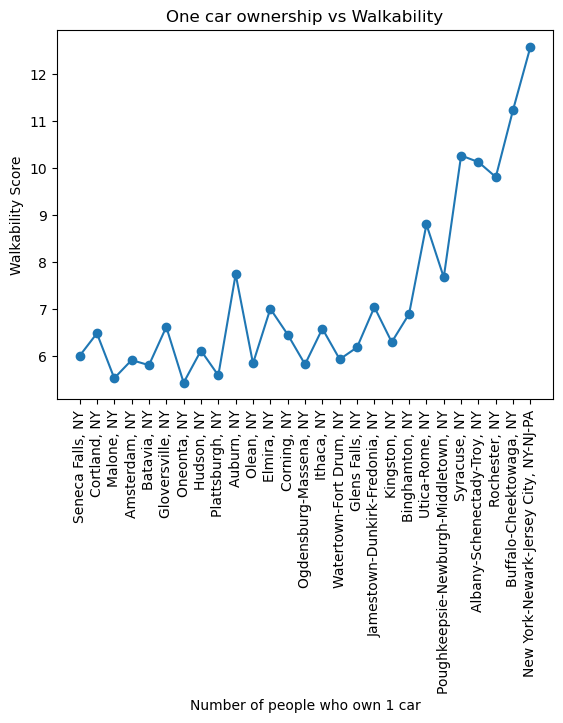

In [20]:
#BASED ON RAW NUMBERS - OWNS 1 CAR

# Get data
combined_transportation_data = combined_transportation_data.sort_values(by = "AutoOwn1")
autoOwn1 = combined_transportation_data["AutoOwn1"]
natWalk = combined_transportation_data["NatWalkInd"]

# Plot the line chart
plt.plot(range(len(autoOwn1)), natWalk, marker='o', linestyle='-')

plt.xticks(range(len(autoOwn1)), combined_transportation_data["CBSA_Name"],rotation=90)

# Add labels and title
plt.xlabel('Number of people who own 1 car')
plt.ylabel('Walkability Score')
plt.title('One car ownership vs Walkability')

#save image
#plt.gcf().set_size_inches(8,8)
#plt.tight_layout()
#plt.savefig('1 car ownership - line.png', dpi = 500)

# Display the plot
plt.show()

In [21]:
#BASED ON RAW NUMBERS - OWNS AT LEAST 1 CAR

#%%capture --no-display

# Get data
autoOwn1 = combined_transportation_data["AutoOwn1"]
natWalk = combined_transportation_data["NatWalkInd"]

walkability = combined_transportation_data["NatWalkInd"].astype(int)

combined_transportation_data['size'] = combined_transportation_data["NatWalkInd"] **2.5

# Configure the map plot
map_plot_1 = combined_transportation_data.hvplot.points(
    "Lng",
    "Lat",
    geo = True, 
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size ="size",
    color="red"
)

#save image
#hvplot.save(map_plot_1, '1 car ownership - map.png')
#image save didnt work on the map so i screenshot the image

# Display the map
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (size)

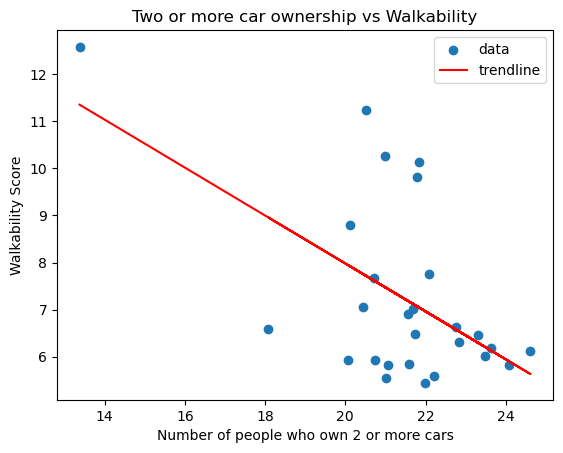

In [22]:
#BASED ON PERCENTAGE - OWNS 2 OR MORE CARS 

# Get data
autoOwn2 = combined_transportation_data["Percent AutoOwn2p"]
natWalk = combined_transportation_data["NatWalkInd"]

#linear regression
slope, intercept = np.polyfit(autoOwn2, natWalk, 1)

#creates scatter plot
plt.scatter(autoOwn2, natWalk, label='data')

#plot the trendline
trendline = slope * autoOwn2 + intercept
plt.plot (autoOwn2, trendline, color='red', label='trendline')

# Add axis labels
plt.xlabel('Number of people who own 2 or more cars')
plt.ylabel('Walkability Score')
plt.title('Two or more car ownership vs Walkability')

plt.legend()

#save image
#plt.savefig('2+ car ownership - scatter.png', dpi = 500)

plt.show()

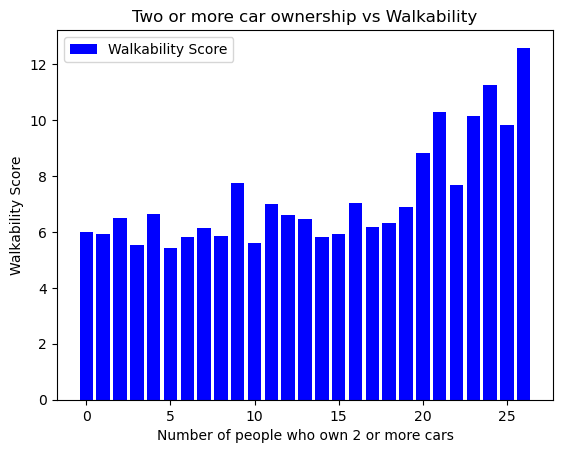

In [23]:
#BASED ON RAW DATA - OWNS 2 OR MORE CARS 

# Get data
combined_transportation_data = combined_transportation_data.sort_values(by = "AutoOwn2p")
autoOwn2 = combined_transportation_data["AutoOwn2p"]
natWalk = combined_transportation_data["NatWalkInd"]

# Plot the bar graph
plt.bar(range(len(autoOwn2)), natWalk, color='blue', label='Walkability Score')

# Add axis labels
plt.xlabel('Number of people who own 2 or more cars')
plt.ylabel('Walkability Score')
plt.title('Two or more car ownership vs Walkability')

# Set x-axis ticks and labels
#plt.xticks(range(len(autoOwn2)), combined_transportation_data["CBSA_Name"],rotation=90)

# Display the legend
plt.legend()

##save image
#plt.gcf().set_size_inches(8,8)
#plt.tight_layout()
#plt.savefig('2+ car ownership - bar.png', dpi = 500)

# Display the plot
plt.show()


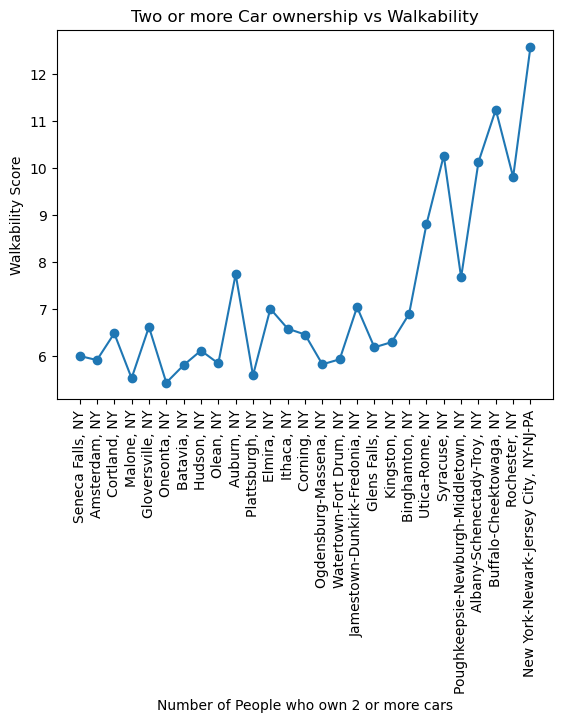

In [24]:
#BASED ON RAW DATA - OWNS 2 OR MORE CARS 

# Get data
combined_transportation_data = combined_transportation_data.sort_values(by = "AutoOwn2p")
autoOwn2 = combined_transportation_data["AutoOwn2p"]
natWalk = combined_transportation_data["NatWalkInd"]

# Plot the line chart
plt.plot(range(len(autoOwn2)), natWalk, marker='o', linestyle='-')

plt.xticks(range(len(autoOwn2)), combined_transportation_data["CBSA_Name"],rotation=90)

# Add labels and title
plt.xlabel('Number of People who own 2 or more cars')
plt.ylabel('Walkability Score')
plt.title('Two or more Car ownership vs Walkability')

##save image
#plt.gcf().set_size_inches(8,8)
#plt.tight_layout()
#plt.savefig('2+ car ownership - line.png', dpi = 500)

# Display the plot
plt.show()

In [25]:
#BASED ON RAW DATA - OWNS 2 OR MORE CARS 

#%%capture --no-display

# Get data
autoOwn2 = combined_transportation_data["AutoOwn2p"]
natWalk = combined_transportation_data["NatWalkInd"]

walkability = combined_transportation_data["NatWalkInd"].astype(int)

combined_transportation_data['size'] = combined_transportation_data["NatWalkInd"] **2.5

# Configure the map plot
map_plot_1 = combined_transportation_data.hvplot.points(
    "Lng",
    "Lat",
    geo = True, 
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size ="size",
    color="red"
)

# Display the map
map_plot_1


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (size)

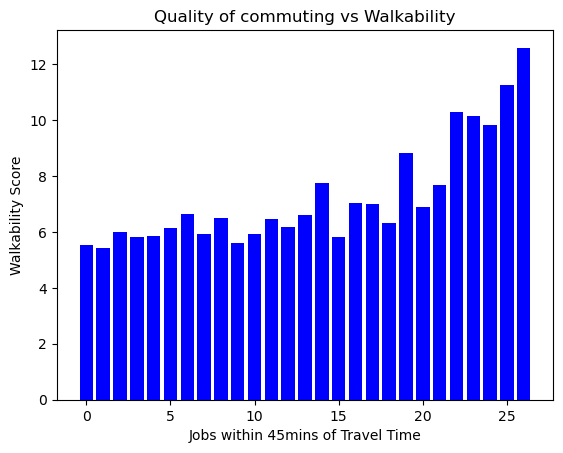

In [26]:
#BASED ON RAW DATA - JOBS WITHIN 45mins OF TRAVEL TIME

# Get data
combined_transportation_data = combined_transportation_data.sort_values(by = "D5AR")
d5ar = combined_transportation_data["D5AR"]
natWalk = combined_transportation_data["NatWalkInd"]


#Plot the bar graph
plt.bar(range(len(d5ar)), natWalk, color='blue', label='Walkability Score')

# Add axis labels
plt.xlabel('Jobs within 45mins of Travel Time')
plt.ylabel('Walkability Score')
plt.title('Quality of commuting vs Walkability')

#plt.xticks(range(len(d5ar)), combined_transportation_data["CBSA_Name"],rotation=90)

##save image
#plt.gcf().set_size_inches(8,8)
#plt.tight_layout()
#plt.savefig('Jobs within 45mins - bar.png', dpi = 500)

# Display the plot
plt.show()


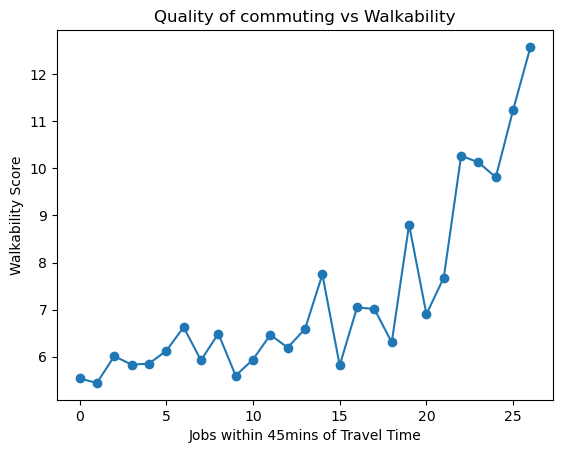

In [27]:
#BASED ON RAW DATA - JOBS WITHIN 45mins OF TRAVEL TIME

# Get data
combined_transportation_data = combined_transportation_data.sort_values(by = "D5AR")
d5ar = combined_transportation_data["D5AR"]
natWalk = combined_transportation_data["NatWalkInd"]

# Plot the line chart
plt.plot(range(len(d5ar)), natWalk, marker='o', linestyle='-')

#plt.xticks(range(len(d5ar)), combined_transportation_data["CBSA_Name"],rotation=90)

# Add labels and title
plt.xlabel('Jobs within 45mins of Travel Time')
plt.ylabel('Walkability Score')
plt.title('Quality of commuting vs Walkability')

##save image
#plt.gcf().set_size_inches(8,8)
#plt.tight_layout()
#plt.savefig('Jobs within 45mins - line.png', dpi = 500)


# Display the plot
plt.show()

In [28]:
#BASED ON RAW DATA - JOBS WITHIN 45mins OF TRAVEL TIME

#%%capture --no-display

# Get data
d5ar = combined_transportation_data["D5AR"]
natWalk = combined_transportation_data["NatWalkInd"]

walkability = combined_transportation_data["NatWalkInd"].astype(int)

combined_transportation_data['size'] = combined_transportation_data["NatWalkInd"] **2.5

# Configure the map plot
map_plot_1 = combined_transportation_data.hvplot.points(
    "Lng",
    "Lat",
    geo = True, 
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size ="size",
    color="red"
)

#hvplot.save(map_plot_1, '45min distance - map.png')

# Display the map
map_plot_1



:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (size)

In [29]:
#WALKABILILY vs CAR OWNERSHIP AND COMMUTE

#The dataset provides information about walkability and car ownership in New York and its counties. 
#The focus of this analysis is to explore the relationship between walkability and car ownership as well as Jobs within 45mins auto 
#travel time.
#These findings can be used for urban planning and people who want to move into a county based on quality of walkability.
#Impact of City Size, Transportation Infrastructure and Car Ownership on Walkability
#Bigger Cities/counties tend to have higher overall walkability scores. The positive correlatin suggests that larger cities are 
#designed to be more walkable, possibly due to concentrated urban planning efforts.
#Walkability is not solely dependent on car ownership. Other factors, such as public transportation accessibility or pedestrian-friendly 
#urban planning, might be contributing to the high walkability scores.
#A positive correlation is evident between city size and walkability scores
#Metropolitan New York is an outlier in the dataset.